In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd


In [2]:
1# Lood our Liborles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
train =pd.read_csv('sign_mnist_train.csv')

test= pd.read_csv('sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
labels =train ['label'].values


In [6]:

unique_val= np.array(labels) 
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

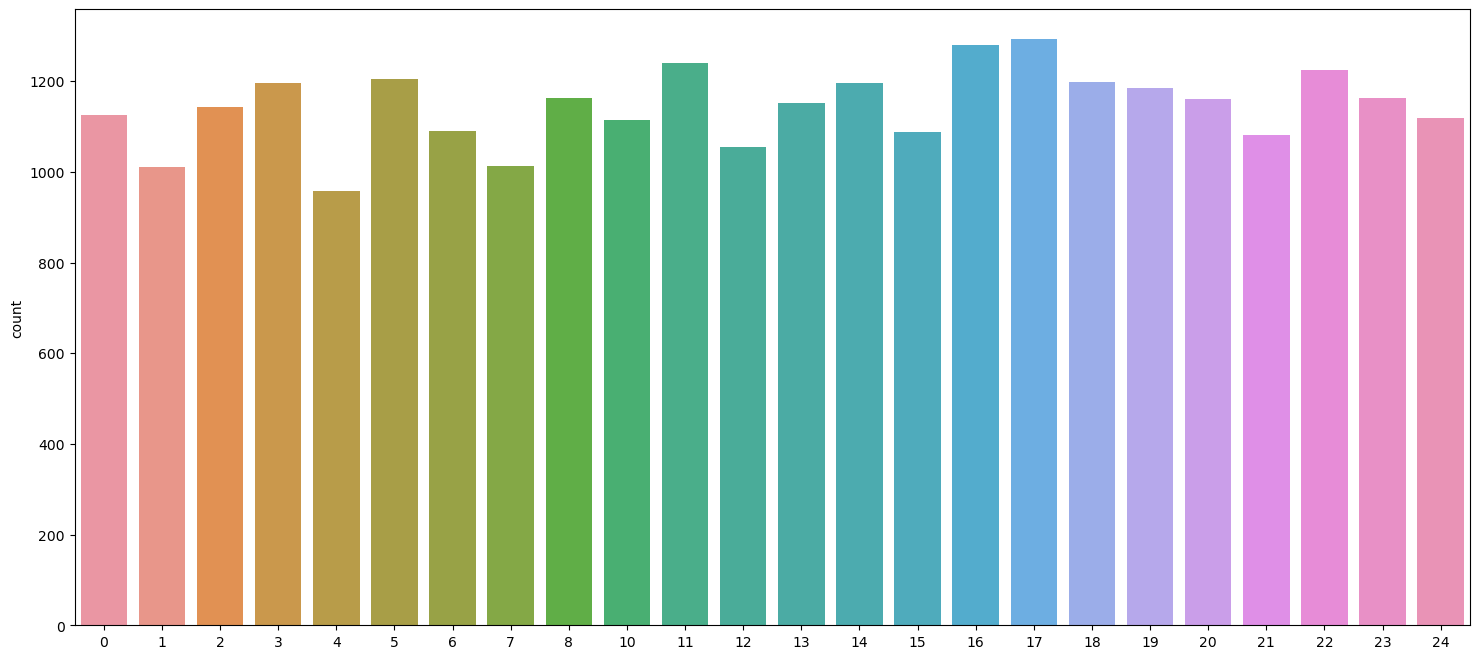

In [7]:
plt.figure(figsize =(18,8)) 
sns.countplot(x =labels)

In [8]:
train.drop('label',axis =1,inplace =True)

In [9]:
images =train.values
images= np.array([np.reshape(i, (28, 28)) for i in images])
images =np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer=LabelBinarizer()

labels =label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


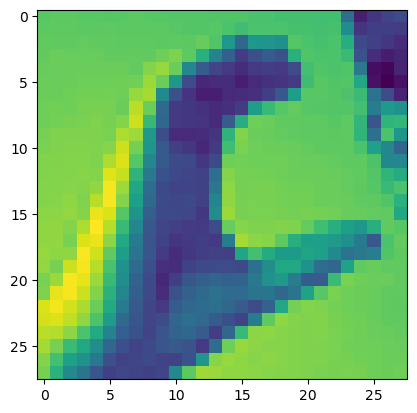

In [12]:
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
import cv2
import numpy as np
for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_in =images[rand]
    sample =input_in.reshape(28,28).astype(np.uint8) 
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(images, labels,test_size=0.3, random_state=101)


In [14]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


batch_size =128
num_classes = 24
epochs= 10

In [15]:
x_train =x_train / 255
x_test = x_test / 255

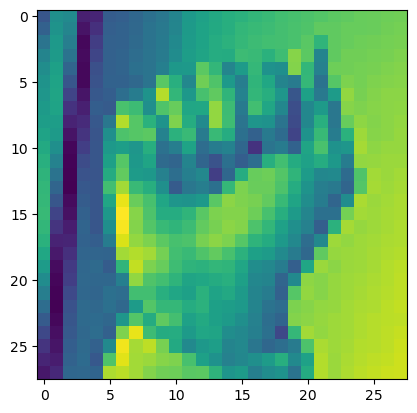

In [16]:
x_train =x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test =x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(24, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer= Adam(),
             metrics=['accuracy'])

In [21]:
history =model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=epochs,batch_size=batch_size)

Epoch 1/10


151/151 [==============================] - 5s 26ms/step - loss: 2.1238 - accuracy: 0.3821 - val_loss: 1.0408 - val_accuracy: 0.6669
Epoch 2/10
151/151 [==============================] - 3s 22ms/step - loss: 0.7158 - accuracy: 0.7825 - val_loss: 0.5270 - val_accuracy: 0.8349
Epoch 3/10
151/151 [==============================] - 3s 22ms/step - loss: 0.3565 - accuracy: 0.8927 - val_loss: 0.2780 - val_accuracy: 0.9113
Epoch 4/10
151/151 [==============================] - 3s 23ms/step - loss: 0.1893 - accuracy: 0.9490 - val_loss: 0.1382 - val_accuracy: 0.9695
Epoch 5/10
151/151 [==============================] - 3s 21ms/step - loss: 0.0991 - accuracy: 0.9801 - val_loss: 0.0841 - val_accuracy: 0.9798
Epoch 6/10
151/151 [==============================] - 3s 20ms/step - loss: 0.0545 - accuracy: 0.9917 - val_loss: 0.0558 - val_accuracy: 0.9870
Epoch 7/10
151/151 [==============================] - 3s 20ms/step - loss: 0.0322 - accuracy: 0.9964 - val_loss: 0.0353 - val_accuracy: 0.99

In [23]:

 model.save("sign_mnist_con_50_Epochs1.h5")

 print("Model Saved")



Model Saved


C:\Users\Kishan021\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


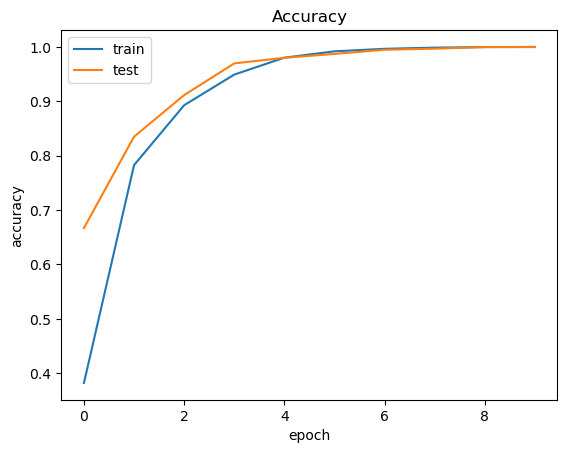

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Accuracy")

plt.xlabel('epoch')

plt.ylabel('accuracy')

plt.legend(['train','test'])
plt.show()           

In [25]:
test_labels=test["label"]
test.drop('label', axis=1, inplace=True)

test_images=test.values

test_images=np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred=model.predict(test_images)


225/225 [==============================] - 1s 3ms/step


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8331009481316229

In [ ]:
def getLetter(result):

    classlabels =  {0: 'A',
                    1: 'B',

                    2: 'C',

                    3: 'D',

                    4: 'E',
                    5: 'F',

                    6: 'G',

                    7: 'H',
                    8: 'I',

                    9: 'K',

                    10: 'L',

                    11: 'M',
                    12: 'N',

                    13: 'O',

                    14: 'P',
                    15: 'Q',
                    16: 'R',

                    17: 'S',

                    18: 'T',

                    19: 'U',

                    20: 'V',

                    21: 'W',
                    22: 'X',

                    23: 'Y'}
    try:
        res=int(result)

        return classlabels[res]
    except:
        return "ERROR"

In [ ]:
import tensorflow as tf
import cv2
model=tf.keras.models.load_model("sign_mnist_con_50_Epochs1.h5")
cap = cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    
    frame=cv2.flip(frame,1)

    roi= frame[100:400, 320:620]

    cv2.imshow('roi', roi)

    roi=cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    roi=cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)

    copy=frame.copy()

    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)


    roi=roi.reshape(1,28,28,1)

    result=str(model.predict(roi, 1, verbose=0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('frame', copy)
    key = cv2.waitKey(0)

    if key == 27 or key == 113:
        break

cap.release()

cv2.destroyAllWindows()


In [ ]:
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass